<a href="https://colab.research.google.com/github/Rawal-29/Artificial-Intelligence/blob/main/Project_1_g_Rawal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import sweetviz as sv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv('/content/telco-customer_churn.csv')
print("Data types of each column (initially after loading):")
print(df.dtypes)

print("Task 1: Data Preparation")
print("Missing/Null/NaN values per column:")
print(df.isnull().sum())

print("\nColumns with empty strings:")
empty_string_cols = []
for col in df.columns:
    empty_count = (df[col] == " ").sum()
    if empty_count > 0:
        print(f"{col}: {empty_count} empty strings")
        empty_string_cols.append(col)

for col in empty_string_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    print(f"Missing values in {col} after conversion:")
    print(df[col].isnull().sum())
    df[col] = df[col].fillna(df[col].median())


numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    print(f"Outliers in {col}: {len(outliers)}")

binary_cols = [col for col in df.columns if df[col].nunique() == 2 and df[col].dtype == 'object']
print("\nIdentified binary columns:", binary_cols)
for col in binary_cols:
    unique_values = df[col].unique()
    mapping = {unique_values[0]: 0, unique_values[1]: 1}
    print(f"Mapping for {col}: {mapping}")
    df[col] = df[col].map(mapping)

# 2. All remaining categorical columns (including high cardinality like customerID)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nAll categorical columns to encode:", categorical_cols)

le = LabelEncoder()
for col in categorical_cols:
    print(f"Encoding {col} with {df[col].nunique()} unique values")
    df[col] = le.fit_transform(df[col])

# Verify all columns are numeric
print("\nData types after conversion:")
print(df.dtypes)
non_numeric_cols = df.select_dtypes(exclude=['number']).columns.tolist()
if non_numeric_cols:
    print("Warning: Some columns remain non-numeric:", non_numeric_cols)
else:
    print("All columns successfully converted to numeric.")





Data types of each column (initially after loading):
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
Task 1: Data Preparation
Missing/Null/NaN values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         

In [8]:
print("Task 2: List Data Types")
print("Data types of each column (after transformation):")
print(df.dtypes)


Task 2: List Data Types
Data types of each column (after transformation):
customerID            int64
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


Task 3: Exploratory Data Analysis


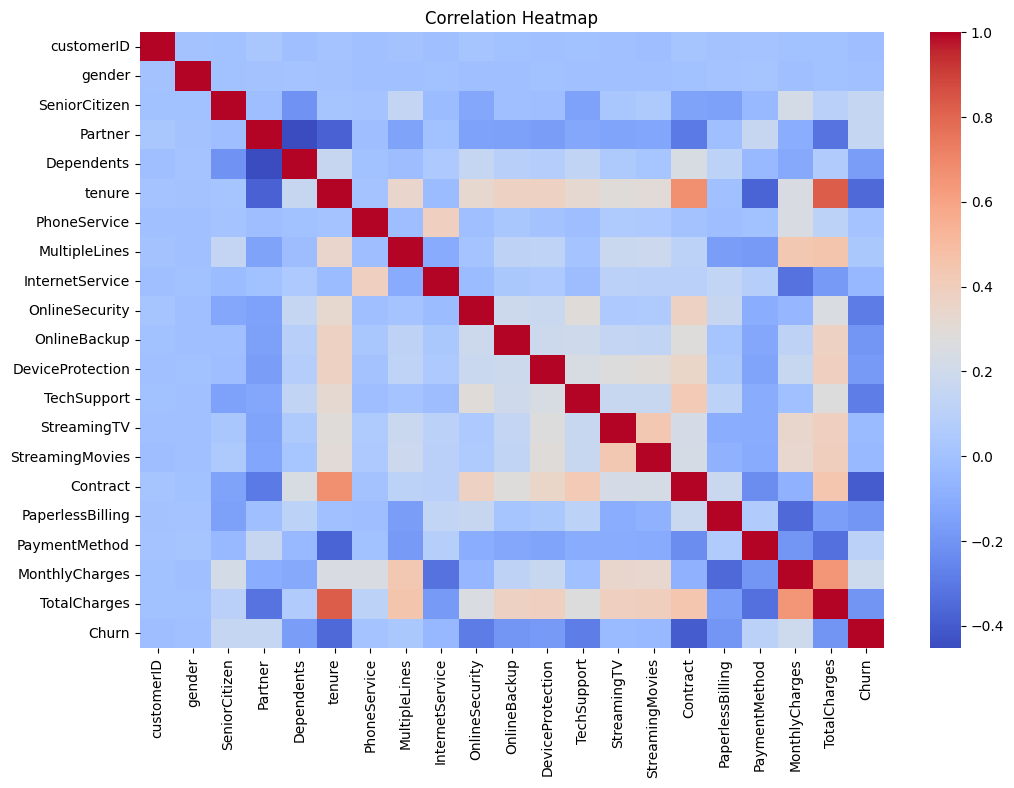

Correlation with Churn (top 10 positive and negative):
Churn             1.000000
MonthlyCharges    0.193356
SeniorCitizen     0.150889
Partner           0.150448
PaymentMethod     0.107062
MultipleLines     0.038037
PhoneService      0.011942
gender           -0.008612
customerID       -0.017447
StreamingTV      -0.036581
Name: Churn, dtype: float64
InternetService    -0.047291
Dependents         -0.164221
DeviceProtection   -0.178134
PaperlessBilling   -0.191825
OnlineBackup       -0.195525
TotalCharges       -0.199037
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64
Top 10 Important Features affecting Churn:
TotalCharges       0.157868
MonthlyCharges     0.145979
tenure             0.138915
customerID         0.130442
Contract           0.082580
OnlineSecurity     0.041921
PaymentMethod      0.041798
TechSupport        0.034164
InternetService    0.026080
OnlineBackup       0.023915
dtype:

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

ydata-profiling report generated as 'eda_report.html'


In [9]:
print("Task 3: Exploratory Data Analysis")

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

churn_corr = df.corr()['Churn'].sort_values(ascending=False)
print("Correlation with Churn (top 10 positive and negative):")
print(churn_corr.head(10))
print(churn_corr.tail(10))

X = df.drop('Churn', axis=1)
y = df['Churn']
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top 10 Important Features affecting Churn:")
print(feature_importance.head(10))

# Generate ydata-profiling report
profile = ProfileReport(df, title="EDA Profiling Report", explorative=True)
profile.to_file("eda_report.html")
print("ydata-profiling report generated as 'eda_report.html'")

In [10]:

print("Task 4: Split Dataset and SweetViz Comparison")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

report = sv.compare([train_df, "Training Data"], [test_df, "Test Data"], target_feat="Churn")
report.show_html("train_test_comparison.html")
print("SweetViz comparison report generated as 'train_test_comparison.html'")


Task 4: Split Dataset and SweetViz Comparison


                                             |          | [  0%]   00:00 -> (? left)

Report train_test_comparison.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
SweetViz comparison report generated as 'train_test_comparison.html'


In [11]:
print("Task 5: Limitations/Issues")
churn_dist = df['Churn'].value_counts(normalize=True) * 100
print("Churn distribution (%):")
print(churn_dist)

print("""
Observations and potential issues with the dataset:
1. Missing values in 'TotalCharges' (converted to NaN, filled with median).
2. Numeric features may have outliers (see IQR results).
3. High dimensionality after encoding (33 columns).
4. Class imbalance in 'Churn' (see distribution).
5. Limited numeric features (3).
""")

Task 5: Limitations/Issues
Churn distribution (%):
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64

Observations and potential issues with the dataset:
1. Missing values in 'TotalCharges' (converted to NaN, filled with median).
2. Numeric features may have outliers (see IQR results).
3. High dimensionality after encoding (33 columns).
4. Class imbalance in 'Churn' (see distribution).
5. Limited numeric features (3).

